In [1]:
# Bibliotecas
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Dados MNIST
mnist = keras.datasets.mnist

# Particao padrão de treino e teste
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


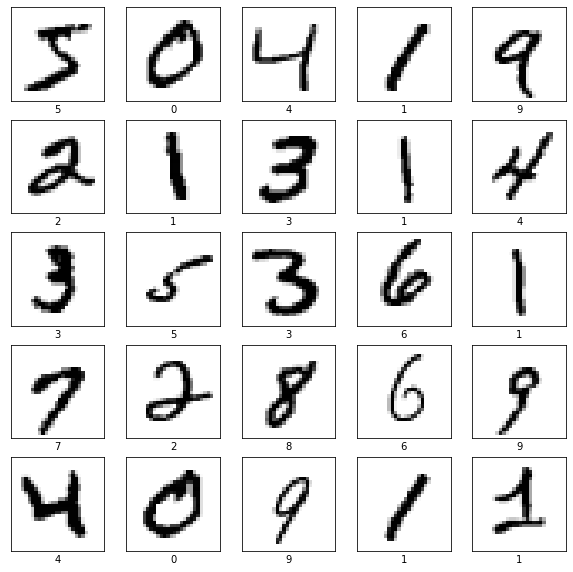

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(train_labels[i])

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_images = train_images / 255
teste_images = test_images / 255

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
28*28

784

In [ ]:
# Nosso primeiro modelo
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)                        
])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

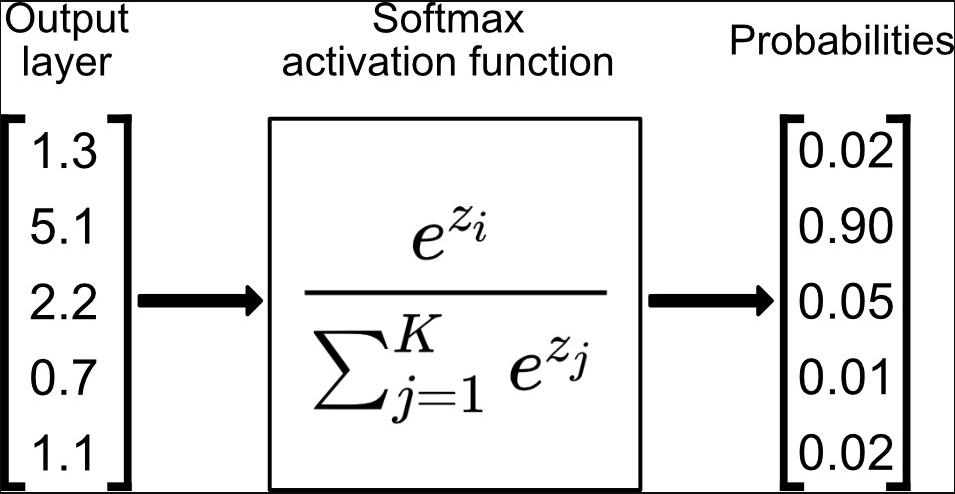

Fonte: https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treinamento
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2553 - accuracy: 0.9275
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1199 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0610 - accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9889
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0349 - accuracy: 0.9904
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.030

In [ ]:
# Acurácia e o loss no teste
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Loss no teste:", test_loss)
print("Accuracy no teste:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 23.5779 - accuracy: 0.9763
Loss no teste: 23.577911376953125
Accuracy no teste: 0.9763000011444092


In [ ]:
# mostrar scores graficamente
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)  


In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10),range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# predições
predictions = model.predict(test_images)
print(predictions[123])

print(str(np.argmax(predictions[123])))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6


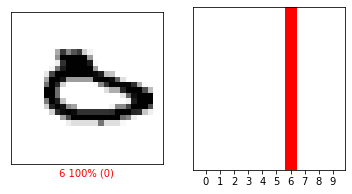

In [ ]:
i = 717
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

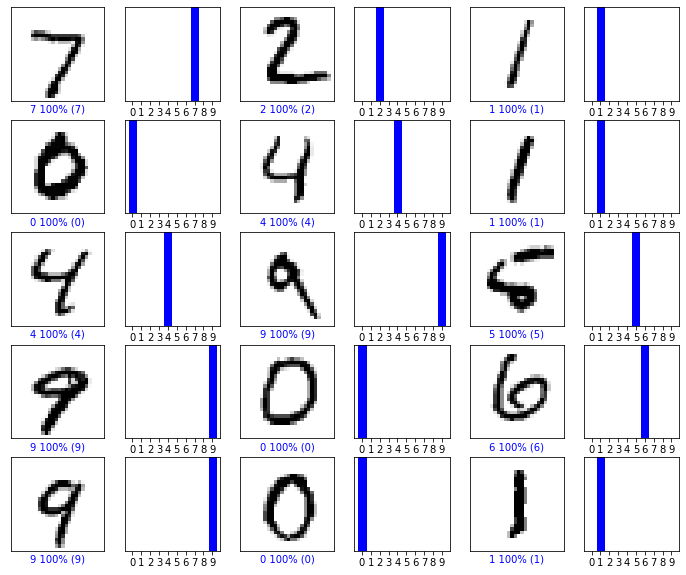

In [ ]:
# 15 imagens
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [ ]:
predictions = model.predict(test_images)
for i in range(1000):
  if(np.argmax(predictions[i]) != test_labels[i]):
    print(i)

18
115
247
259
321
340
381
445
495
582
610
628
674
691
707
717
720
726
740
795
944
947
951
965


Vamos trabalhar com o Cifar100

In [2]:
# Dados Cifar 100
cifar = keras.datasets.cifar100

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

169017344/169001437 [==============================] - 8s 0us/step


In [ ]:
# Dimensões
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels)) # 100 classes

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


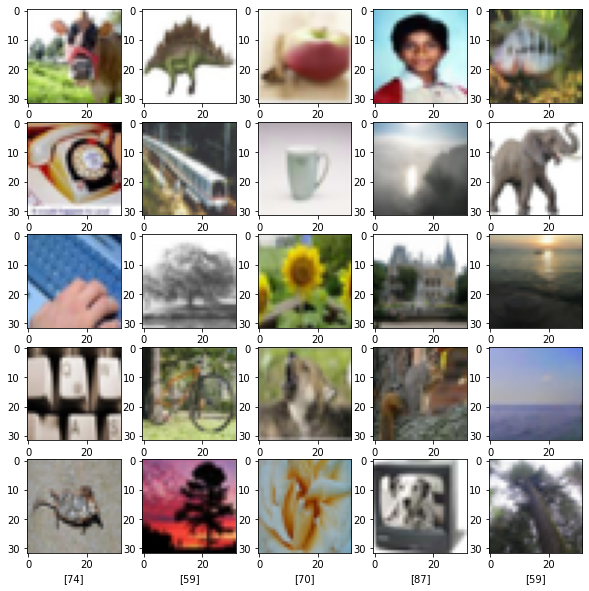

In [ ]:
# Mostrando 25 imagens
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])

In [ ]:
train_images[10]

array([[[ 83, 132, 178],
        [ 67, 114, 160],
        [ 61, 108, 154],
        ...,
        [  9,  26,  57],
        [ 16,  34,  66],
        [ 35,  59,  94]],

       [[ 75, 124, 173],
        [ 71, 119, 167],
        [ 55, 103, 152],
        ...,
        [ 39,  67, 107],
        [  9,  28,  65],
        [ 12,  31,  66]],

       [[ 73, 121, 173],
        [ 68, 115, 166],
        [ 74, 122, 172],
        ...,
        [ 91, 132, 178],
        [ 53,  83, 125],
        [ 14,  34,  70]],

       ...,

       [[159, 187, 223],
        [150, 146, 159],
        [191, 154, 143],
        ...,
        [152, 131, 136],
        [173, 143, 158],
        [122, 123, 150]],

       [[157, 171, 202],
        [155, 133, 132],
        [183, 152, 141],
        ...,
        [213, 168, 159],
        [196, 146, 153],
        [169, 157, 180]],

       [[150, 160, 186],
        [155, 127, 122],
        [179, 149, 139],
        ...,
        [212, 159, 148],
        [187, 136, 135],
        [148, 135, 154]]

In [ ]:
# Deixar as imagens entre 0 e 1
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
# Nosso primeiro modelo
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(32,32,3)),
  keras.layers.Dense(256, activation=tf.nn.relu),
  keras.layers.Dense(100, activation=tf.nn.softmax)                        
])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 100)               25700     
                                                                 
Total params: 812,388
Trainable params: 812,388
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 4.2652 - accuracy: 0.0499
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.9384 - accuracy: 0.0974
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.8684 - accuracy: 0.1138
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.8348 - accuracy: 0.1197
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.8335 - accuracy: 0.1221
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.8264 - accuracy: 0.1237
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.8314 - accuracy: 0.1227
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.8443 - accuracy: 0.1216
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.8480 - accuracy: 0.1221
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 3.857

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 4.0103 - accuracy: 0.0993
4.010269641876221
0.09929999709129333


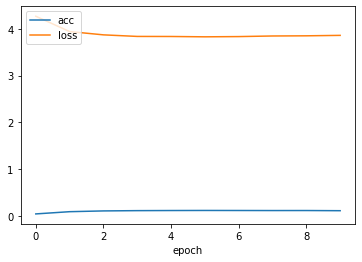

In [ ]:
# Mostrar graficamente
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [ ]:
# Modelo profundo
model2 = keras.Sequential()

model2.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model2.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model2.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(1024, activation='relu'))
model2.add(keras.layers.Dense(100, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)       

In [ ]:
# Treinamento
history = model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 5ms/step - loss: 3.7419 - accuracy: 0.1296
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9147 - accuracy: 0.2767
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4593 - accuracy: 0.3688
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0614 - accuracy: 0.4517
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6732 - accuracy: 0.5418
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2800 - accuracy: 0.6374
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9259 - accuracy: 0.7266
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6642 - accuracy: 0.7992
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5015 - accuracy: 0.8450
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.40

In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 5.0127 - accuracy: 0.3518
5.012718677520752
0.35179999470710754


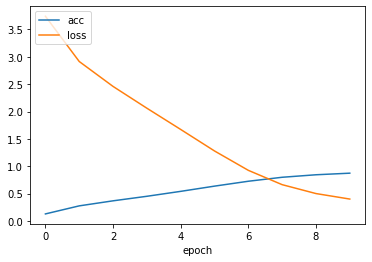

In [ ]:
# Mostrar graficamente
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

Dropout

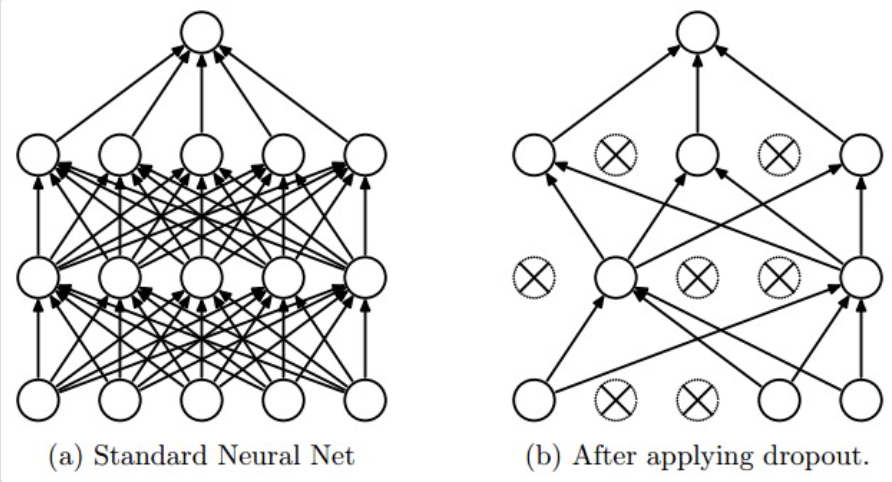

In [ ]:
# Modelo profundo
model3 = keras.Sequential()

model3.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model3.add(keras.layers.Dropout(0.2))

model3.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model3.add(keras.layers.Dropout(0.2))

model3.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model3.add(keras.layers.Dropout(0.2))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(1024, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(100, activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

In [ ]:
# Treinamento
history = model3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.9876 - accuracy: 0.0883
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.2778 - accuracy: 0.2097
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9758 - accuracy: 0.2646
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.7711 - accuracy: 0.3043
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.6304 - accuracy: 0.3318
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4972 - accuracy: 0.3598
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3859 - accuracy: 0.3825
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.2815 - accuracy: 0.4024
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1954 - accuracy: 0.4188
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.110

In [ ]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.6803 - accuracy: 0.3435
2.680325508117676
0.3434999883174896


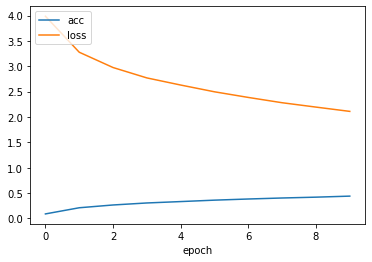

In [ ]:
# Mostrar graficamente
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [ ]:
# Modelo profundo
model4 = keras.Sequential()

model4.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(1024, activation='relu'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(100, activation='softmax'))

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 128)       

In [ ]:
# Treinamento
history = model4.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.7908 - accuracy: 0.1195
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.0511 - accuracy: 0.2505
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.6626 - accuracy: 0.3276
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3618 - accuracy: 0.3877
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0779 - accuracy: 0.4482
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8171 - accuracy: 0.5047
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5581 - accuracy: 0.5636
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3182 - accuracy: 0.6243
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1046 - accuracy: 0.6776
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.960

In [ ]:
test_loss, test_acc = model4.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 3.2302 - accuracy: 0.3680
3.2302019596099854
0.36800000071525574


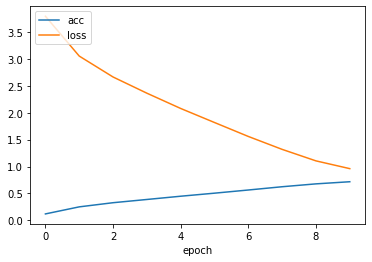

In [ ]:
# Mostrar graficamente
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [ ]:
# Modelo profundo
model5 = keras.Sequential()

model5.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model5.add(keras.layers.Dropout(0.2))

model5.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model5.add(keras.layers.Dropout(0.2))

model5.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model5.add(keras.layers.Dropout(0.2))

model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(1024, activation='relu'))
model5.add(keras.layers.Dropout(0.2))
model5.add(keras.layers.Dense(100, activation='softmax'))

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 64)         

In [ ]:
# Treinamento
history = model5.fit(train_images, train_labels, epochs=25, validation_split=0.2)

test_loss, test_acc = model5.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

Epoch 1/25
1250/1250 [==============================] - 7s 6ms/step - loss: 3.9716 - accuracy: 0.0889 - val_loss: 3.5137 - val_accuracy: 0.1618
Epoch 2/25
1250/1250 [==============================] - 7s 5ms/step - loss: 3.3360 - accuracy: 0.1968 - val_loss: 3.1464 - val_accuracy: 0.2296
Epoch 3/25
1250/1250 [==============================] - 6s 5ms/step - loss: 3.0162 - accuracy: 0.2556 - val_loss: 2.9573 - val_accuracy: 0.2730
Epoch 4/25
1250/1250 [==============================] - 7s 5ms/step - loss: 2.8046 - accuracy: 0.2967 - val_loss: 2.8021 - val_accuracy: 0.3096
Epoch 5/25
1250/1250 [==============================] - 7s 5ms/step - loss: 2.6266 - accuracy: 0.3321 - val_loss: 2.7566 - val_accuracy: 0.3111
Epoch 6/25
1250/1250 [==============================] - 7s 6ms/step - loss: 2.4781 - accuracy: 0.3605 - val_loss: 2.7510 - val_accuracy: 0.3161
Epoch 7/25
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3489 - accuracy: 0.3873 - val_loss: 2.6755 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

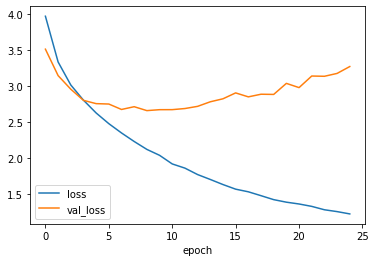

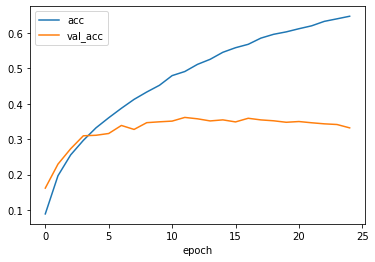

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='lower left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

Batch Normalization
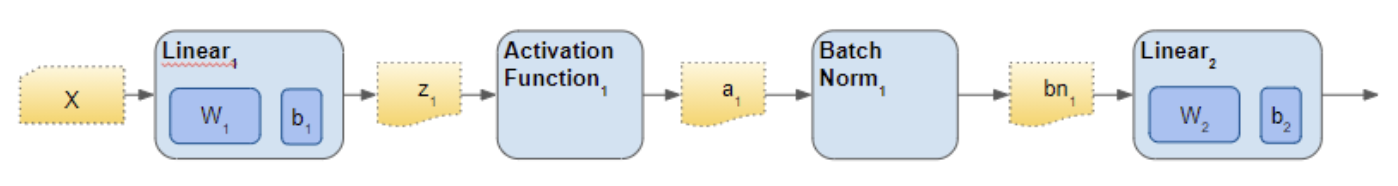

In [ ]:
# Modelo profundo
model6 = keras.Sequential()

model6.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Dropout(0.2))

model6.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Dropout(0.2))

model6.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Dropout(0.2))

model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(1024, activation='relu'))
model6.add(keras.layers.Dropout(0.2))
model6.add(keras.layers.Dense(100, activation='softmax'))

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)        

In [ ]:
# Treinamento
history = model6.fit(train_images, train_labels, epochs=25, validation_split=0.2)

test_loss, test_acc = model6.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

Epoch 1/25
1250/1250 [==============================] - 8s 6ms/step - loss: 3.7247 - accuracy: 0.1476 - val_loss: 3.4861 - val_accuracy: 0.2032
Epoch 2/25
1250/1250 [==============================] - 7s 5ms/step - loss: 3.0091 - accuracy: 0.2621 - val_loss: 2.7750 - val_accuracy: 0.3035
Epoch 3/25
1250/1250 [==============================] - 7s 5ms/step - loss: 2.6396 - accuracy: 0.3312 - val_loss: 2.7604 - val_accuracy: 0.3111
Epoch 4/25
1250/1250 [==============================] - 7s 5ms/step - loss: 2.3566 - accuracy: 0.3895 - val_loss: 2.8909 - val_accuracy: 0.3093
Epoch 5/25
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1336 - accuracy: 0.4331 - val_loss: 2.6218 - val_accuracy: 0.3753
Epoch 6/25
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8870 - accuracy: 0.4918 - val_loss: 2.3684 - val_accuracy: 0.4098
Epoch 7/25
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6706 - accuracy: 0.5420 - val_loss: 2.4243 - val_accuracy:

In [ ]:
# Modelo profundo
model7 = keras.Sequential()

model7.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Dropout(0.2))

model7.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Dropout(0.2))

model7.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Dropout(0.2))

model7.add(keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu') )
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Dropout(0.2))

model7.add(keras.layers.Flatten())
model7.add(keras.layers.Dense(1024, activation='relu'))
model7.add(keras.layers.Dropout(0.2))
model7.add(keras.layers.Dense(512, activation='relu'))
model7.add(keras.layers.Dropout(0.2))
model7.add(keras.layers.Dense(100, activation='softmax'))

model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)        

In [ ]:
# Treinamento
history = model7.fit(train_images, train_labels, epochs=25, validation_split=0.2)

test_loss, test_acc = model7.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

Epoch 1/25
1250/1250 [==============================] - 10s 8ms/step - loss: 3.9636 - accuracy: 0.0988 - val_loss: 3.5023 - val_accuracy: 0.1644
Epoch 2/25
1250/1250 [==============================] - 9s 8ms/step - loss: 3.3931 - accuracy: 0.1844 - val_loss: 3.1355 - val_accuracy: 0.2302
Epoch 3/25
1250/1250 [==============================] - 9s 7ms/step - loss: 3.0578 - accuracy: 0.2413 - val_loss: 3.1009 - val_accuracy: 0.2423
Epoch 4/25
1250/1250 [==============================] - 9s 7ms/step - loss: 2.8045 - accuracy: 0.2907 - val_loss: 2.7955 - val_accuracy: 0.3083
Epoch 5/25
1250/1250 [==============================] - 9s 7ms/step - loss: 2.6025 - accuracy: 0.3347 - val_loss: 2.9126 - val_accuracy: 0.2977
Epoch 6/25
1250/1250 [==============================] - 9s 7ms/step - loss: 2.4334 - accuracy: 0.3700 - val_loss: 2.7264 - val_accuracy: 0.3269
Epoch 7/25
1250/1250 [==============================] - 9s 7ms/step - loss: 2.2881 - accuracy: 0.3981 - val_loss: 2.7301 - val_accuracy

Global Average Pooling

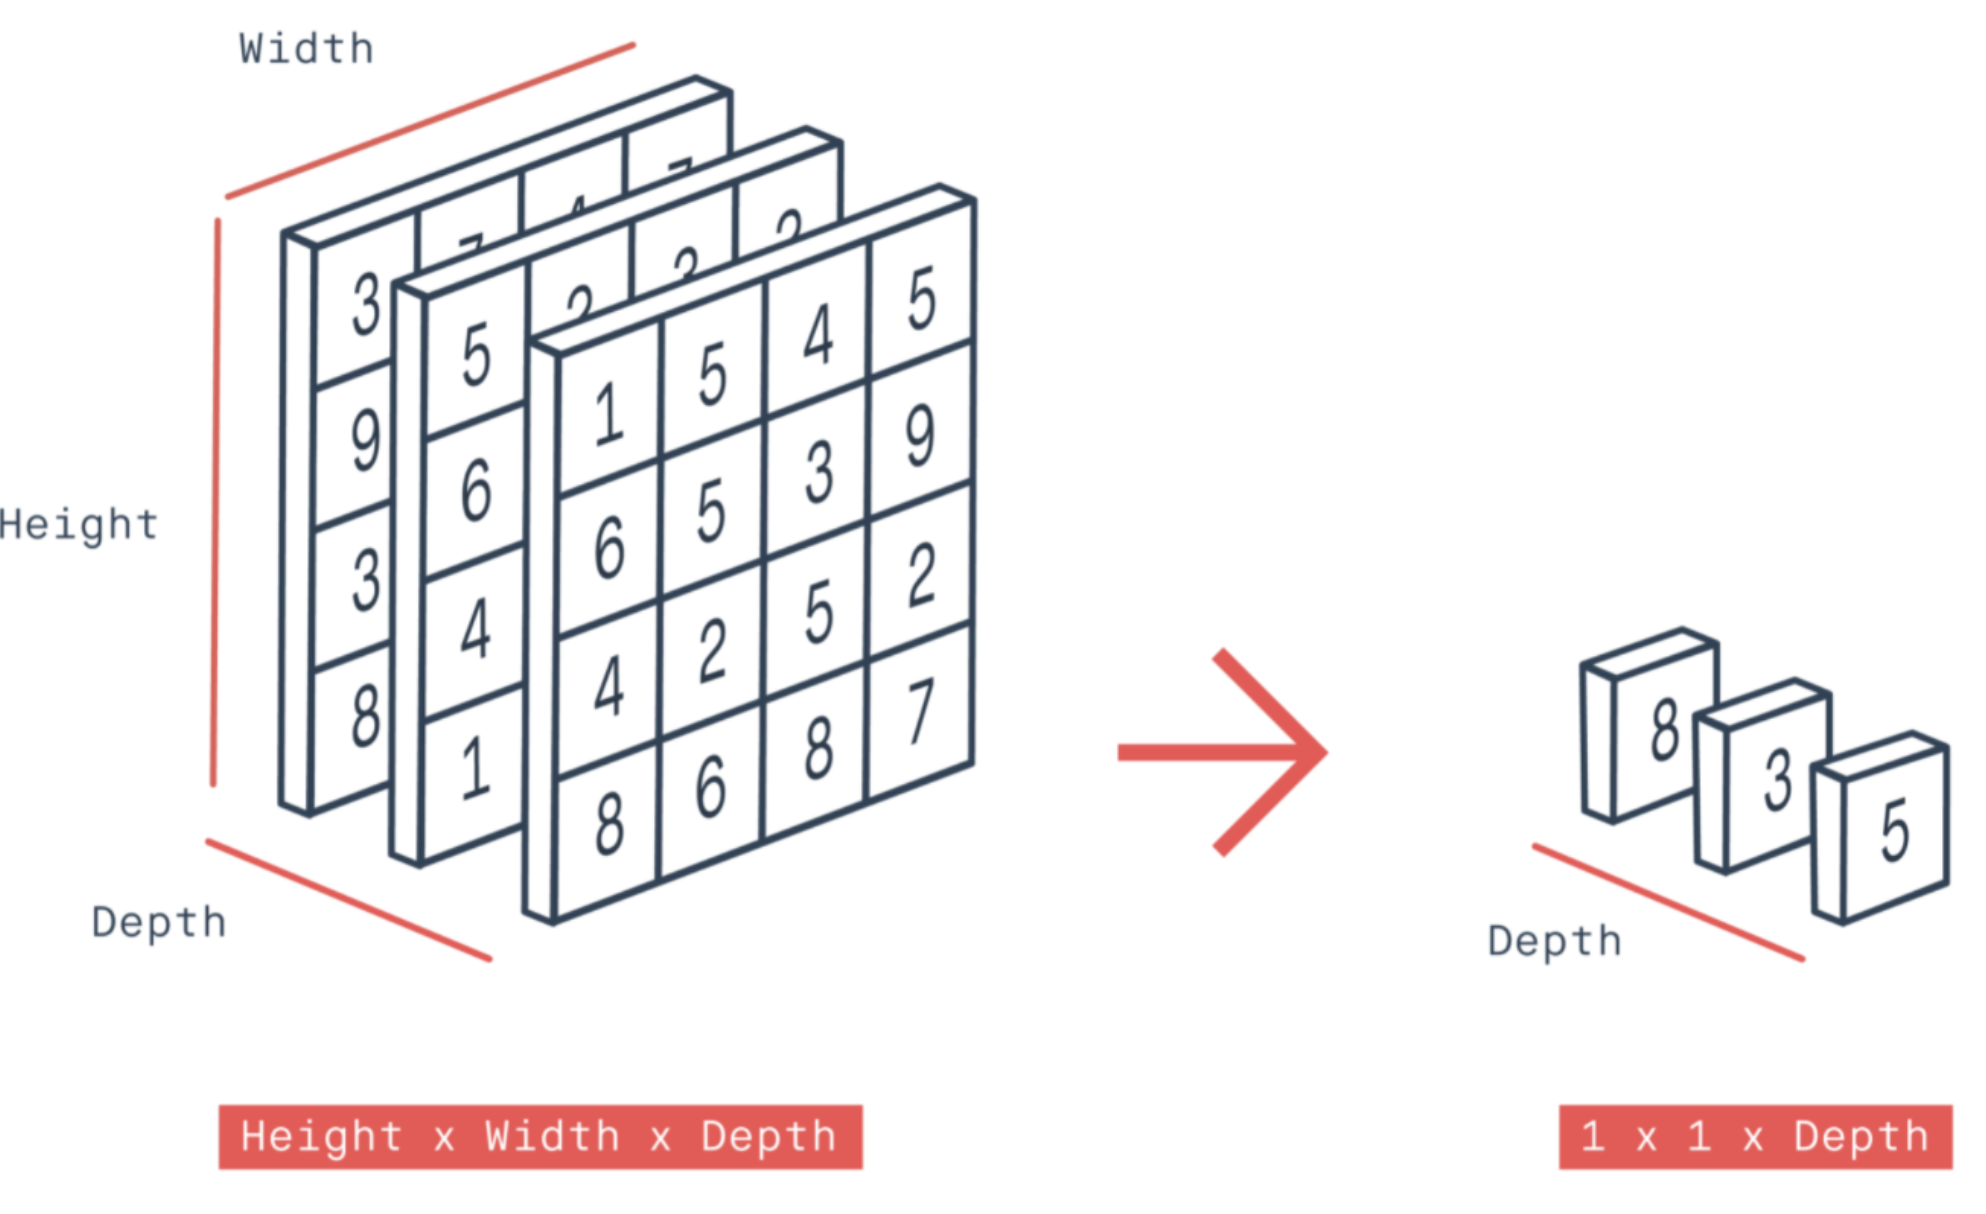

In [5]:
# Modelo profundo

model8 = keras.Sequential()

model8.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model8.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.Dropout(0.2))

model8.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model8.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.Dropout(0.2))

model8.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model8.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.Dropout(0.2))

model8.add(keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu') )
model8.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.Dropout(0.2))


model8.add(keras.layers.GlobalAveragePooling2D())

model8.add(keras.layers.Dense(100,activation="softmax"))

model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model8.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)        

In [6]:
# Treinamento
history = model8.fit(train_images, train_labels, epochs=25, validation_split=0.2)

test_loss, test_acc = model8.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

Epoch 1/25
1250/1250 [==============================] - 18s 7ms/step - loss: 3.4962 - accuracy: 0.1767 - val_loss: 3.7721 - val_accuracy: 0.1810
Epoch 2/25
1250/1250 [==============================] - 8s 7ms/step - loss: 2.7246 - accuracy: 0.3149 - val_loss: 2.5430 - val_accuracy: 0.3458
Epoch 3/25
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3543 - accuracy: 0.3918 - val_loss: 2.5100 - val_accuracy: 0.3617
Epoch 4/25
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1091 - accuracy: 0.4436 - val_loss: 2.3200 - val_accuracy: 0.4003
Epoch 5/25
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9051 - accuracy: 0.4915 - val_loss: 2.2340 - val_accuracy: 0.4254
Epoch 6/25
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7506 - accuracy: 0.5225 - val_loss: 2.2605 - val_accuracy: 0.4321
Epoch 7/25
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6037 - accuracy: 0.5594 - val_loss: 2.1755 - val_accuracy

Vamos colocar nosso modelo em uma função

In [7]:
def def_model():
  
  # Modelo profundo
  model7 = keras.Sequential()

  model7.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
  model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
  model7.add(keras.layers.BatchNormalization())
  model7.add(keras.layers.Dropout(0.2))

  model7.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
  model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
  model7.add(keras.layers.BatchNormalization())
  model7.add(keras.layers.Dropout(0.2))

  model7.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
  model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
  model7.add(keras.layers.BatchNormalization())
  model7.add(keras.layers.Dropout(0.2))

  model7.add(keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu') )
  model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
  model7.add(keras.layers.BatchNormalization())
  model7.add(keras.layers.Dropout(0.2))

  model7.add(keras.layers.Flatten())
  model7.add(keras.layers.Dense(1024, activation='relu'))
  model7.add(keras.layers.Dropout(0.2))
  model7.add(keras.layers.Dense(512, activation='relu'))
  model7.add(keras.layers.Dropout(0.2))
  model7.add(keras.layers.Dense(100, activation='softmax'))

  model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model7.summary()

  return(model7)

In [8]:
# Funções para imprimir history e avaliação
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='lower left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('epoch')
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()
    
def print_eval(test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(test_loss)
    print(test_acc)

In [9]:
# Chama o modelo
model = def_model()

# Define um callback
meus_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.h5'
    )                  
]

history = model.fit(train_images, train_labels, epochs=25,
                    validation_split=0.2,
                    callbacks = meus_callbacks)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)        

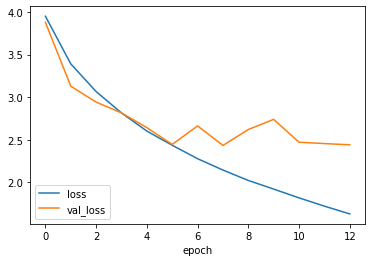

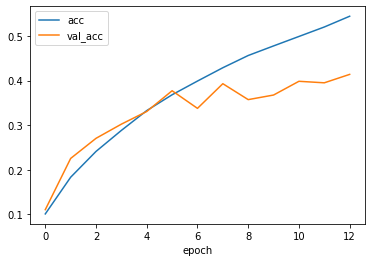

In [11]:
plot_history(history)

In [12]:
print_eval(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 2.3809 - accuracy: 0.4243
2.3809494972229004
0.4242999851703644


In [ ]:
# Tentar melhorar ainda mais o modelo

def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

model = def_model()

meus_callbacks = [
    keras.callbacks.LearningRateScheduler(scheduler),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.h5'
    )   
]

history = model.fit(train_images, train_labels, epochs=25,
                    validation_split=0.2,
                    callbacks = meus_callbacks)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_11 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 8, 8, 64)        

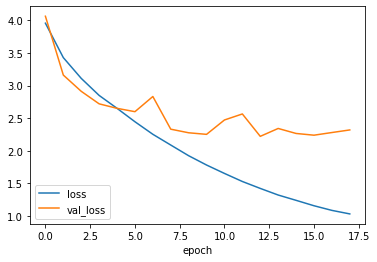

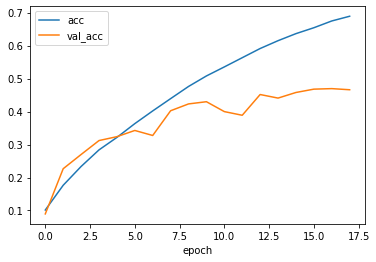

313/313 [==============================] - 1s 4ms/step - loss: 2.2338 - accuracy: 0.4828
2.2337756156921387
0.4828000068664551


In [ ]:
plot_history(history)

print_eval(test_images, test_labels)

In [ ]:
# Vamos tentar mais
model = def_model()

meus_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, # new_lr = lr * 0.1
                                      patience=3, min_lr = 0.0001), 
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.h5'
    )   
]

history = model.fit(train_images, train_labels, epochs=25,
                    validation_split=0.2,
                    callbacks = meus_callbacks)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_31 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 8, 64)       

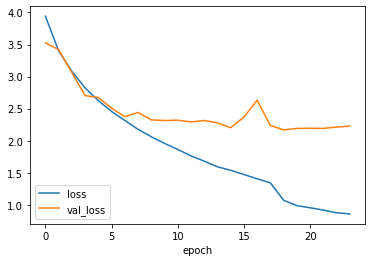

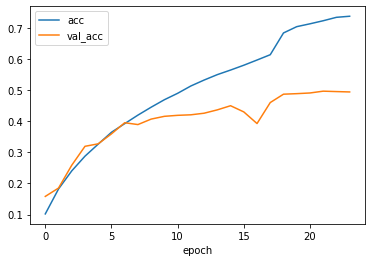

313/313 [==============================] - 1s 4ms/step - loss: 2.1604 - accuracy: 0.4984
2.1603596210479736
0.4984000027179718


In [ ]:
plot_history(history)

print_eval(test_images, test_labels)

E se gerarmos mais versões das imagens?

In [ ]:
# Vamos visualizar uma imagem
def visualize(image):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(image)

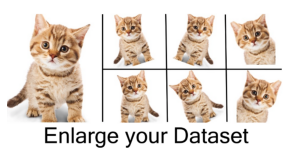

In [ ]:
import cv2 

image = cv2.imread('gatos1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

visualize(image)

In [ ]:
!pip install albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


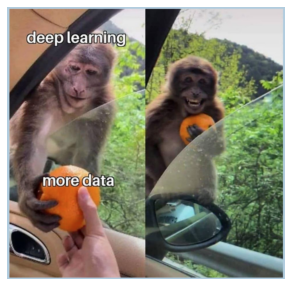

In [ ]:
import albumentations as da
import random
import cv2

image = cv2.imread('macaco1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

visualize(image)

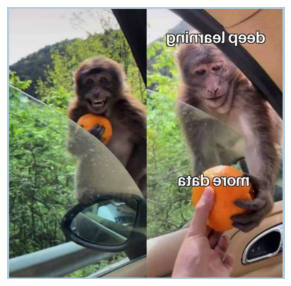

In [ ]:
transform = da.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

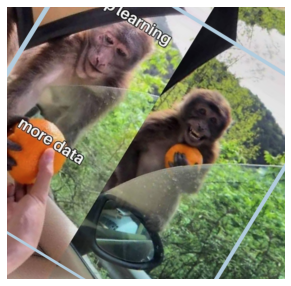

In [ ]:
transform = da.ShiftScaleRotate(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

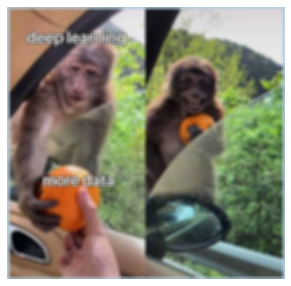

In [ ]:
transform = da.Blur(blur_limit=100)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

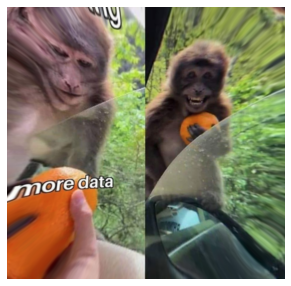

In [ ]:
transform = da.OpticalDistortion(distort_limit=1)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

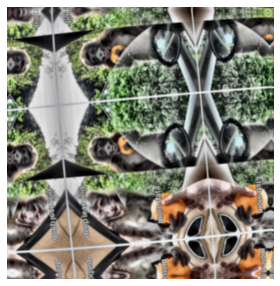

In [ ]:
transform = da.Compose([
    da.CLAHE(),
    da.RandomRotate90(p=0.5),
    da.Transpose(p=0.5),
    da.ShiftScaleRotate(shift_limit=0.50, scale_limit=0.50, rotate_limit=345, p=.75),
    da.Blur(blur_limit=10),
    da.OpticalDistortion(distort_limit=0.5),
    da.GridDistortion(distort_limit=0.5),
    da.HueSaturationValue(),
])
random.seed(7) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

In [ ]:
!pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.Fliplr(0.2), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.1,
        iaa.GaussianBlur(sigma=(0, 0.25))
    ),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.4, 0.6), "y": (0.4, 0.6)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-10, 10),
        shear=(-4, 4)
    )
], random_order=True)

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
# Dados de treino e dividir em treino e validação
from sklearn.model_selection import train_test_split

train_images, X_val, train_labels, Y_val = train_test_split(
    train_images, train_labels, test_size=0.2)

In [ ]:
train_images.shape

(40000, 32, 32, 3)

In [ ]:
# Gerar imagens aleatórias
import numpy as np

for i in range(3):
  train_images = np.vstack( (train_images,
                             seq.augment_images(train_images[:40000])))
  train_labels = np.vstack( (train_labels, train_labels[:40000]) )

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(160000, 32, 32, 3)
(160000, 1)


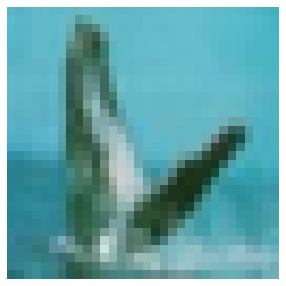

In [ ]:
visualize(train_images[30000])

In [ ]:
# Retreinar modelo
model = def_model()

meus_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, # new_lr = lr * 0.1
                                      patience=3, min_lr = 0.0001), 
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.h5'
    )   
]

history = model.fit(train_images, train_labels, epochs=25,
                    validation_data = (X_val, Y_val),
                    callbacks = meus_callbacks)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)        

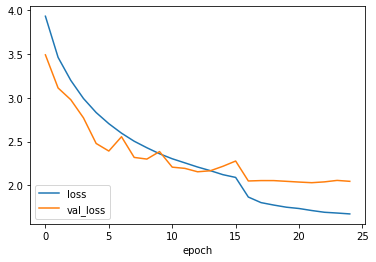

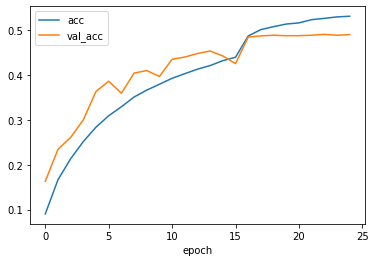

313/313 [==============================] - 1s 4ms/step - loss: 1.9793 - accuracy: 0.5018
1.9792743921279907
0.501800000667572


In [ ]:
plot_history(history)

print_eval(test_images, test_labels)

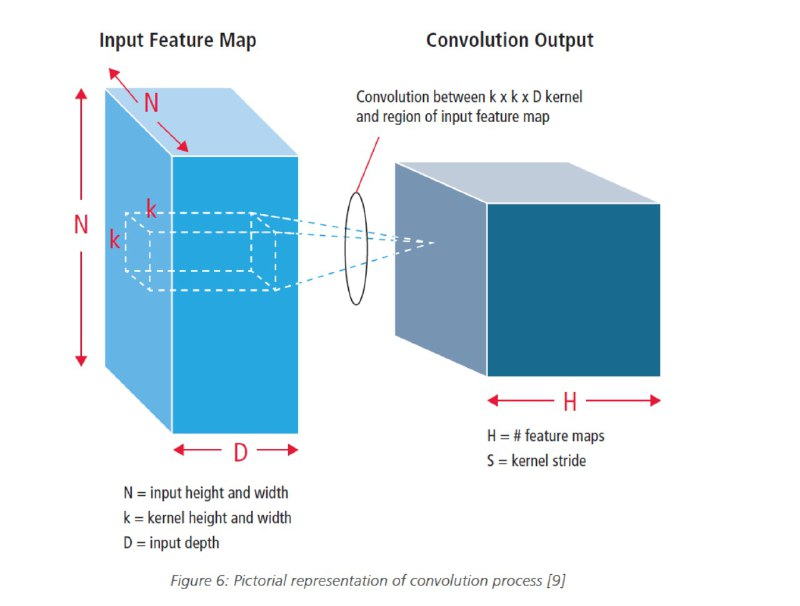

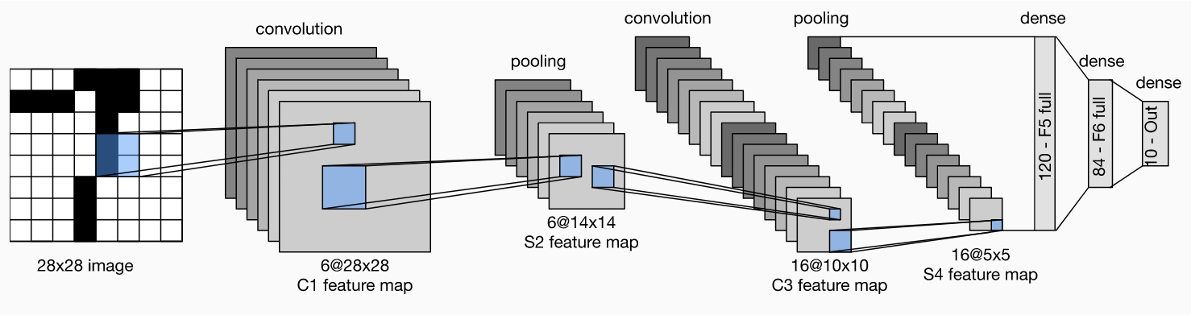